# Part 1 - bad figures
Figures help convey information about your project or some aspect of an analysis. Bad figures can be ugly at best or misleading at worst. What falls under the umbrella of "bad" is actually pretty easy to remedy, assuming that the information you are plotting is correct. In fact, having good asthetics can actually help you figure out if your information is good in the first place. Many figures can indicate if you have either a bug in your code or a mistake in yoru analysis.

This notebook is meant to help you make good figures to share at group meetings. The specifics will only apply to matplotlib, the plotting package in Python, but the general asthetic advice will be true for any language.

One quick note - this advice is all with respect to figures in slides. Some details (e.g. best font size, color choices, layout) may change if you are making slides for a journal article or for a poster, but only slightly.

Let's start by getting ready to plot things.

In [1]:
#This lets plots appear in the notebook.
%matplotlib inline 

#Import libraries, using shorthand for their names
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Make some fake data with 20 points randomly spaced along the x-axis in the interval 0 to 10
N = 20
x = np.sort(np.random.uniform(0, 10, N))
#Let's have y have a linear depenence on x, with a slope of 2.5 and an intercept of -1
m = 2.5
b = -1.0
y = m * x + b

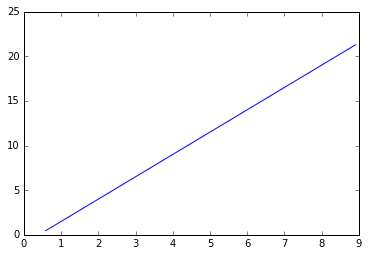

In [3]:
#Plot this data
plt.plot(x, y)

## 1.1 our first crappy plot
The above plot is crappy. Why? Big reasons:
* the axes aren't labeled
* the number of data points is of the same order as the domain, which means we shold be looking at the **points** rather than a **line**

Let's start by fixing these things.

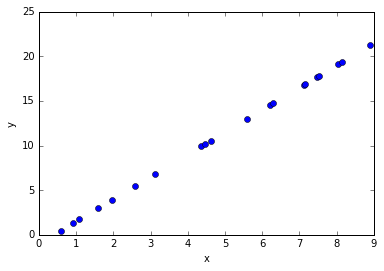

In [4]:
#Plot this data again
plt.plot(x, y, linestyle = '', marker='o')
plt.xlabel("x")
plt.ylabel("y")

## 1.2 better, but still crappy
Our plot is still kind of crappy looking. This is becauase:
* the axis labels are small
* the tick labels are small

Let's now fix these aspects. Through trial and error, I have found that axis labels look good on a projector with a fontsize of ~24 and tick labels look readable with a fontsize of ~16. All of these things can be adjusted through the pyplot environment as shown here. There are other ways to do this, such as through the figure object or the axes object. If you have to use that route, just Google how to do so.

(array([  0.,   5.,  10.,  15.,  20.,  25.]),
 <a list of 6 Text yticklabel objects>)

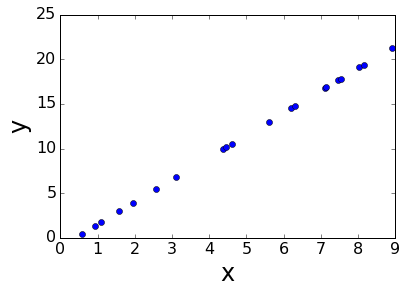

In [5]:
#Plot this data again
plt.plot(x, y, linestyle = '', marker='o')
plt.xlabel("x", fontsize=24)
plt.ylabel("y", fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Part 2 - units and fonts
Most plots we make have units on them, so we should display those units in the labels. Let's make a new set of data that I'll make up on the spot.

In [6]:
#Let's pretend we measured the position of an object in freefall that started from rest at y=0 as a function of time. 
#We'll use MKS units because reasons.
g = 9.81 #m/s^2
time = np.arange(0, 2, 0.1) #Measured for 2 seconds every 0.1 seconds
height = -g*time**2

(array([-40., -35., -30., -25., -20., -15., -10.,  -5.,   0.]),
 <a list of 9 Text yticklabel objects>)

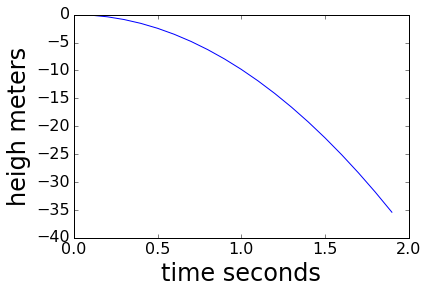

In [7]:
#Plot the freefall data
plt.plot(time, height)#, ls='-', marker='')
plt.xlabel("time seconds", fontsize=24)
plt.ylabel("heigh meters", fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

## 2.1 display units well, use fonts that aren't lame
When displaying the x-axis, variables are in *italics* and units are not. In addition, units should always be abbreviated to their shorthand (e.g. s instead of seconds) and should be put in blocks []. So a good axis label can be specified with
```python
plt.xlabel(r"$t\ [{\rm s}]$"
#{\rm } means everything inside will un-italicize things in math mode
# a slash with a space after "\ " will force a space to appear in math mode
```

The default matplotlib font sucks for displaying text and tick labels. Many people (me) find the LaTeX font more asthetically pleasing. You can force matplotlib to rending in tex by giving the text as a "raw" string:

```python
r"raw string"
"not a raw strong"
```

and by putting things into latex math mode with the $ sign:

```python
r"$y=mx+b$"
"y=mx+b"
```
The former will look like $y=mx+b$ while the latter will look like y=mx+b.

(array([-40., -35., -30., -25., -20., -15., -10.,  -5.,   0.]),
 <a list of 9 Text yticklabel objects>)

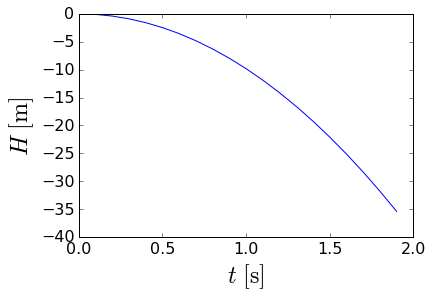

In [8]:
#Plot the freefall data
plt.plot(time, height)#, ls='-', marker='')
plt.xlabel(r"$t\ [{\rm s}]$", fontsize=24)
plt.ylabel(r"$H\ [{\rm m}]$", fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

## 2.2 automatically using LaTeX
To get matplotlib to render everything with LaTeX is very easy. This will include the axis labels, tick labels, titles, legends, floating text, and anything else. You just throw in the line:
```python
plt.rc("text", usetex=True)
```
This alters the "rc" parameters being used by matplotlib at that moment. This is basically magic, and don't bother learning about anymore than you have to right now, but you should know that "rc" is how you customize matplotlib in general.

(array([-40., -35., -30., -25., -20., -15., -10.,  -5.,   0.]),
 <a list of 9 Text yticklabel objects>)

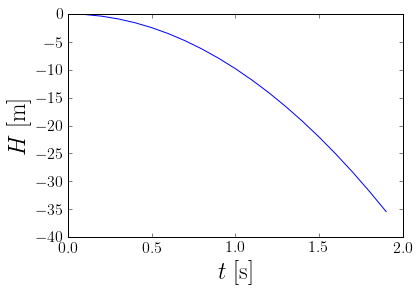

In [9]:
#Plot the freefall data
plt.rc("text", usetex=True)
plt.plot(time, height)#, ls='-', marker='')
plt.xlabel(r"$t\ [{\rm s}]$", fontsize=24)
plt.ylabel(r"$H\ [{\rm m}]$", fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Part 3 empty space
Empty space can be a huge annoyance. Consider the following two versions of plotting our first set of data.

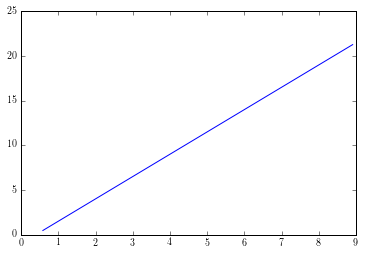

In [10]:
plt.plot(x, y)

(0, 20)

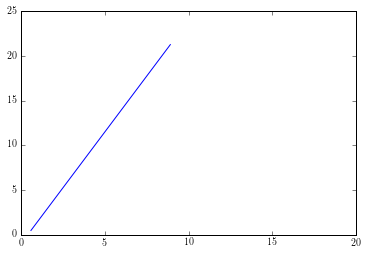

In [11]:
plt.plot(x, y)
plt.xlim(0, 20)

In the second example I changed the limits of the x-axis on purpose to make it look bad by adding a bunch of blank space on the right side. Matplotlib is pretty good at stopping this from happening, but sometimes it failes miserably. If it does, manipulate the domain and range using these functions:
```python
plt.xlim()
plt.ylim()
```

# Part 4 scaling
Sometimes data shouldn't be plotted with linear axes, but should have logarithmic axes instead. Let's look a basic plot of the amount of carbon 14 in some sample, which has a half-life of ~6000 years, over the course of a long time period. The number of atoms in that sample is given by the equation

$^{14}C(t) = \frac{^{14}C(t=0)}{2^{t/6000}}$

In [12]:
#Let's pretend we have 600,000 years worth of measurements of how much C14 exists, with measurements every 10000 years.
time = np.arange(6e5, 0, -10000)
#Now let's pretend we started with ~1 mole of C14 atoms
C_init = 6e23 #6 with 23 zeros
C = C_init / 2**(time/6000)

(array([  0.00000000e+00,   5.00000000e+22,   1.00000000e+23,
          1.50000000e+23,   2.00000000e+23]),
 <a list of 5 Text yticklabel objects>)

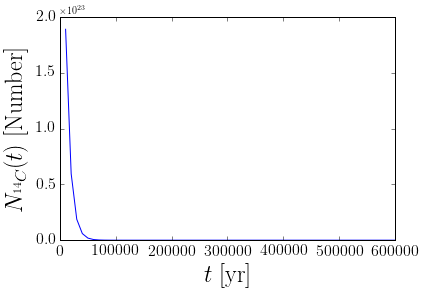

In [13]:
#Plot the carbon data, using the good-formatting practices we learned so far
plt.rc("text", usetex=True)
plt.plot(time, C)#, ls='-', marker='')
plt.xlabel(r"$t\ [{\rm yr}]$", fontsize=24)
plt.ylabel(r"$N_{^{14}C}(t)\ [{\rm Number}]$", fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 3.1 log scaling, bro
Wow, this plot suffers from seriously bad empty space. Notice how the Y-axis scales linearly with number, but we know it drops off exponentially. Here, the plot would be better suited to having a log-spaced y-axis.

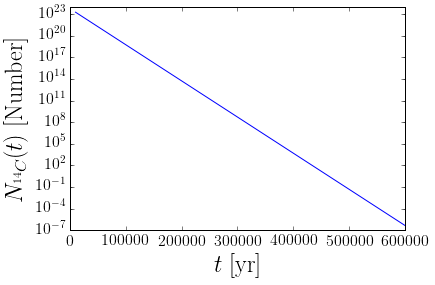

In [14]:
#Plot the carbon data
plt.rc("text", usetex=True)
plt.plot(time, C)#, ls='-', marker='')
plt.xlabel(r"$t\ [{\rm yr}]$", fontsize=24)
plt.ylabel(r"$N_{^{14}C}(t)\ [{\rm Number}]$", fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.yscale("log")
#plt.yscale("linear") was used by default

This is much more useful, and can even be used to directly measure the half-life that we put in. If you want both axes to be log-scaled, you can simply use the ```python plt.loglog()``` function, or change x-axis as well with the ```python plt.xscale("log")``` function.

(array([  1.00000000e-10,   1.00000000e-07,   1.00000000e-04,
          1.00000000e-01,   1.00000000e+02,   1.00000000e+05,
          1.00000000e+08,   1.00000000e+11,   1.00000000e+14,
          1.00000000e+17,   1.00000000e+20,   1.00000000e+23,
          1.00000000e+26,   1.00000000e+29]),
 <a list of 14 Text yticklabel objects>)

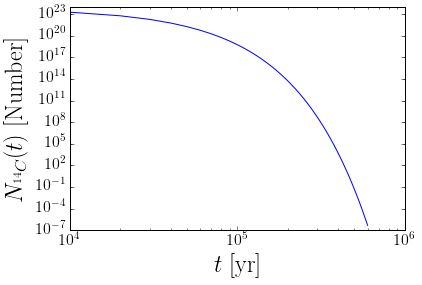

In [15]:
#Plot the carbon data
plt.rc("text", usetex=True)
plt.loglog(time, C)#, ls='-', marker='')
plt.xlabel(r"$t\ [{\rm yr}]$", fontsize=24)
plt.ylabel(r"$N_{^{14}C}(t)\ [{\rm Number}]$", fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Part 4: smaller things
Some smaller details that I didn't think deserved their own sections - always make sure lin